# Introduction

In [ ]:
#import libraries

import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Enterprise Data Science Group Project 2/airplane_train_processed_date.csv')

In [ ]:
# Select target
y = train.satisfaction

# Select predictors
X = train.drop(['satisfaction'], axis=1)

**Methods to control the data quality**

Our primary objective in developing our machine learning model is to ensure its long-term effectiveness. One of our main challenges is maintaining good data quality over time, as this is crucial for the success of our model.

In the context of Machine Learning in Production, we refer to the phenomenon of data drift, which occurs when the distribution of data changes over time. Detecting data drift is essential, and our model should be able to identify it and potentially address it. So, how can we detect data drift?

To tackle this challenge, we create a sample of data that represents individual runs of our model or measurements taken over time. This sample allows us to monitor changes in data distribution and detect data drift, enabling us to take appropriate measures to address it and ensure the continued effectiveness of our model.



# Using Statistical Methods
**Kolmogorov-Smirnov (K-S) test**

In [ ]:
df1 = train.sample(frac = 0.1, random_state = 21).reset_index().drop(columns = ['index'], axis = 1)
df2 = train.sample(frac = 0.1, random_state = 22).reset_index().drop(columns = ['index'], axis = 1)
df3 = train.sample(frac = 0.1, random_state = 23).reset_index().drop(columns = ['index'], axis = 1)
df4 = train.sample(frac = 0.1, random_state = 24).reset_index().drop(columns = ['index'], axis = 1)
df5 = train.sample(frac = 0.1, random_state = 25).reset_index().drop(columns = ['index'], axis = 1)
df6 = train.sample(frac = 0.1, random_state = 26).reset_index().drop(columns = ['index'], axis = 1)
df7 = train.sample(frac = 0.1, random_state = 27).reset_index().drop(columns = ['index'], axis = 1)
df8 = train.sample(frac = 0.1, random_state = 28).reset_index().drop(columns = ['index'], axis = 1)
df9 = train.sample(frac = 0.1, random_state = 29).reset_index().drop(columns = ['index'], axis = 1)
df10 = train.sample(frac = 0.1, random_state = 30).reset_index().drop(columns = ['index'], axis = 1)

**Monitor missing values**

Can the model automatically find out if the data contains information? What threshold or tolerance level should be set for misinformation or missing data?

In [ ]:
def add_nan(df,n_rows):
    new_row = [np.nan for x in range(0,len(df.columns))]
    for i in range(len(df),len(df) + n_rows):
        df.loc[i] = new_row
    
    return df

In [ ]:
df1 = add_nan(df1,50)
df2 = add_nan(df2,500)
df3 = add_nan(df3,250)
df4 = add_nan(df4,1230)
df5 = add_nan(df5,20)
df6 = add_nan(df6,120)
df7 = add_nan(df7,640)
df8 = add_nan(df8,2340)
df9 = add_nan(df9,5550)
df10 = add_nan(df10,710)

In [ ]:
#Calculate missing values as a percentage

nan_1 = df1['Flight Distance'].isnull().sum()/df1['Flight Distance'].count()
nan_2 = df2['Flight Distance'].isnull().sum()/df2['Flight Distance'].count()
nan_3 = df3['Flight Distance'].isnull().sum()/df3['Flight Distance'].count()
nan_4 = df4['Flight Distance'].isnull().sum()/df4['Flight Distance'].count()
nan_5 = df5['Flight Distance'].isnull().sum()/df5['Flight Distance'].count()
nan_6 = df6['Flight Distance'].isnull().sum()/df6['Flight Distance'].count()
nan_7 = df7['Flight Distance'].isnull().sum()/df7['Flight Distance'].count()
nan_8 = df8['Flight Distance'].isnull().sum()/df8['Flight Distance'].count()
nan_9 = df9['Flight Distance'].isnull().sum()/df9['Flight Distance'].count()
nan_10 = df10['Flight Distance'].isnull().sum()/df10['Flight Distance'].count()

In [ ]:
#To a pandas series

missing = pd.Series([nan_1,nan_2,nan_3,nan_4,nan_5,nan_6,nan_7,nan_8,nan_9,nan_10])

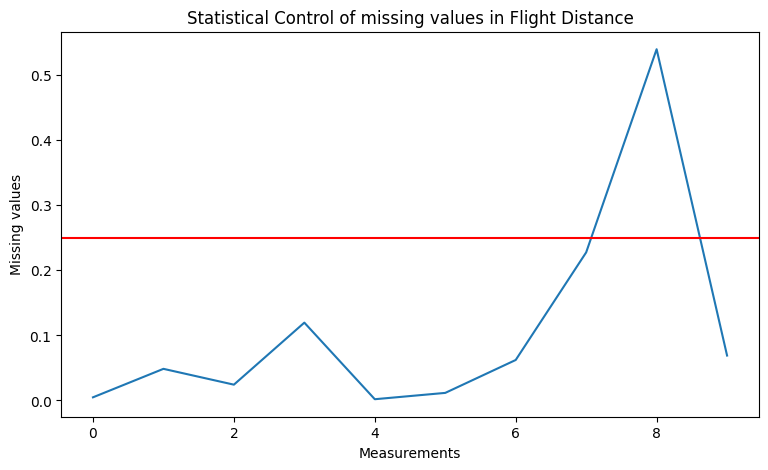

In [ ]:
#Create a visualization
plt.figure(figsize=(9, 5))

viz = sns.lineplot(data = missing)
viz.axhline(0.25, color='r')

plt.xlabel('Measurements')
plt.ylabel('Missing values')
plt.title('Statistical Control of missing values in Flight Distance')
plt.show()

This simple visualization helps to monitorize the data quality of the column 'Flight Distance' over the time.

**Monitor outliers**

Are different data being added to the model? Is the model studying data from the same flights?

In this subsection, we want to check if the variable Flight Distance presents outliers over the time. One way is to check if the difference between the median and the mean is increasing.

In [ ]:
#Define the variable to be monitorized

FD_1 = df1['Flight Distance'].dropna()
FD_2 = df2['Flight Distance'].dropna()
FD_3 = df3['Flight Distance'].dropna()
FD_4 = df4['Flight Distance'].dropna()
FD_5 = df5['Flight Distance'].dropna()
FD_6 = df6['Flight Distance'].dropna()
FD_7 = df7['Flight Distance'].dropna()
FD_8 = df8['Flight Distance'].dropna()
FD_9 = df9['Flight Distance'].dropna()
FD_10 = df10['Flight Distance'].dropna()

In [ ]:
#function to add outliers

def add_outliers(variable,n_rows,outlier):
    for i in range(len(variable),len(variable) + n_rows):
        variable.loc[i] = variable.max()*outlier
    return variable

In [ ]:
#Add outliers

FD_1 = add_outliers(FD_1,15,2)
FD_2 = add_outliers(FD_2,15,2)
FD_3 = add_outliers(FD_3,15,1)
FD_4 = add_outliers(FD_4,15,2)
FD_5 = add_outliers(FD_5,15,1)
FD_6 = add_outliers(FD_6,15,2)
FD_7 = add_outliers(FD_7,15,3)
FD_8 = add_outliers(FD_8,15,2)
FD_9 = add_outliers(FD_9,15,3)
FD_10 = add_outliers(FD_10,15,3)

#Calculate difference

dif_1 = abs(FD_1.mean() - FD_1.median())
dif_2 = abs(FD_2.mean() - FD_2.median())
dif_3 = abs(FD_3.mean() - FD_3.median())
dif_4 = abs(FD_4.mean() - FD_4.median())
dif_5 = abs(FD_5.mean() - FD_5.median())
dif_6 = abs(FD_6.mean() - FD_6.median())
dif_7 = abs(FD_7.mean() - FD_7.median())
dif_8 = abs(FD_8.mean() - FD_8.median())
dif_9 = abs(FD_9.mean() - FD_9.median())
dif_10 = abs(FD_10.mean() - FD_10.median())

#Concatenate the results

outliers_difference = [dif_1,dif_2,dif_3,dif_4,dif_5,dif_6,dif_7,dif_8,dif_9,dif_10]

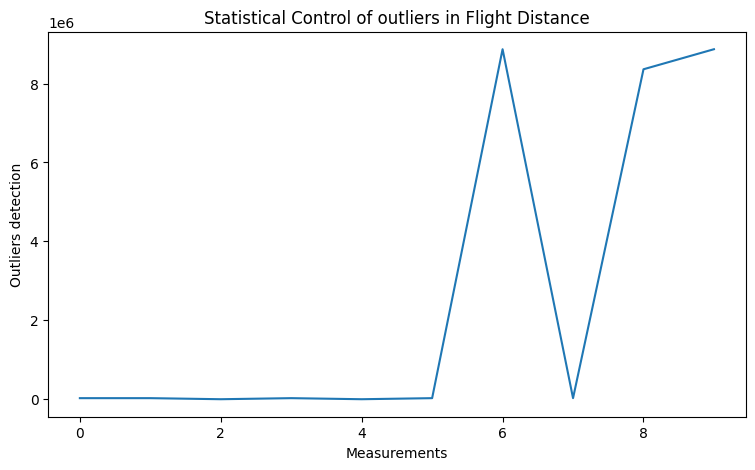

In [ ]:
#Create a visualization
plt.figure(figsize=(9, 5))

viz = sns.lineplot(data = outliers_difference)

plt.xlabel('Measurements')
plt.ylabel('Outliers detection')
plt.title('Statistical Control of outliers in Flight Distance')
plt.show()

What we discover with this plot is that our data was measured good till the sixth and eighth measurement. Thus, our model would be assessing other flights and the output should not be considered as a result.

**Kolmogorov-Smirnov (K-S) test**

KS Test is a nonparametric test of the equality of continuous (or discontinuous), one-dimensional probability distributions that can be used to compare a sample
with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test).

This method takes more importance when we are trying to study if one variable is statistically identical to other. It is a test which gives the null hypothesis that both variables have the same data distribution, Thus, if we reject the null hypothesis we can conclude that there is a drift in the data.

In [ ]:
df_1 = df1['Flight Distance'].dropna()
df_2 = df2['Flight Distance'].dropna()
df_3 = df3['Flight Distance'].dropna()
df_4 = df4['Flight Distance'].dropna()
df_5 = df5['Flight Distance'].dropna()
df_6 = df6['Flight Distance'].dropna()
df_7 = df7['Flight Distance'].dropna()
df_8 = df8['Flight Distance'].dropna()
df_9 = df9['Flight Distance'].dropna()
df_10 = df10['Flight Distance'].dropna()

In [ ]:
# Define the Kolmogorov function
def Kolmogorov(var1,var2):
    
    #Control the lenght error
    a = len(var1)-len(var2)
    
    if a != 0:
        raise ValueError("The length of the variables must be the same")
    
    stat_test = stats.ks_2samp(var1, var2)
    
    p_value = stat_test[1]
    
    
    return p_value

In [ ]:
#Apply the function

p_value_1 = Kolmogorov(df_1,df_2)
p_value_2 = Kolmogorov(df_2,df_3)
p_value_3 = Kolmogorov(df_3,df_4)
p_value_4 = Kolmogorov(df_4,df_5)
p_value_5 = Kolmogorov(df_5,df_6)
p_value_6 = Kolmogorov(df_6,df_7)
p_value_7 = Kolmogorov(df_7,df_8)
p_value_8 = Kolmogorov(df_8,df_9)
p_value_9 = Kolmogorov(df_9,df_10)

#Concatenate the results

p_values = pd.Series([p_value_1,p_value_2,p_value_3,p_value_4,p_value_5,p_value_6,p_value_7,p_value_8,p_value_9])

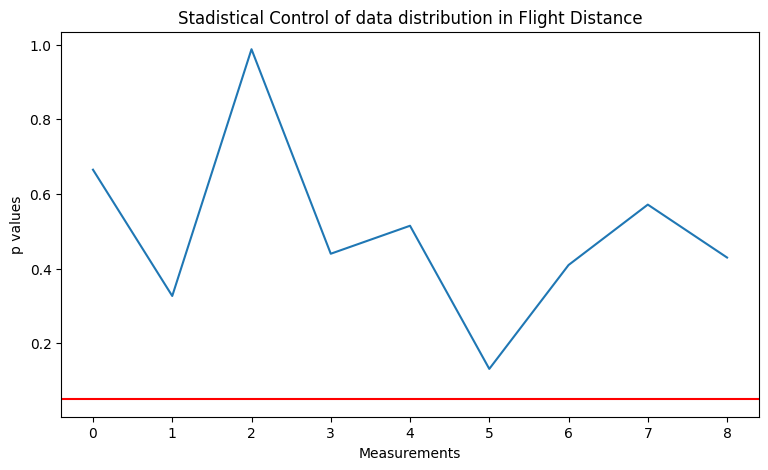

In [ ]:
#plot the results to control the data

plt.figure(figsize=(9, 5))

viz = sns.lineplot(data = p_values)
viz.axhline(0.05, color='r')

plt.xlabel('Measurements')
plt.ylabel('p values')
plt.title('Stadistical Control of data distribution in Flight Distance')
plt.show()

The above visualization is telling us that the statistical properties of these variables, which are the same measured over the time, are identical. We can conclude that the data was ingested correctly.

# Using a ML model 

In [ ]:
!pip install alibi_detect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.2/338.2 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 30.0 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from alibi_detect.cd import ClassifierDrift
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Enterprise Data Science Group Project 2/airplane_test_processed_date.csv')

In [ ]:
# Select target
y_test = train.satisfaction

# Select predictors
X_test = train.drop(['satisfaction'], axis=1)

In [ ]:
model = tf.keras.Sequential(
[
Input(shape=(32, 32, 3)),
Conv2D(8, 4, strides=2, padding='same', activation=tf.nn.relu),
Conv2D(16, 4, strides=2, padding='same', activation=tf.nn.relu),
Conv2D(32, 4, strides=2, padding='same', activation=tf.nn.relu),
Flatten(),
Dense(2, activation='softmax')
]
)
cd = ClassifierDrift(threshold=.55, model=model, X_ref=X, n_folds=5, epochs=2)
preds_drift = cd.predict(X_test, return_metric=True)

In [ ]:
# Filter numerical columns
X = X.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

In [ ]:
# Set random state for reproducibility
random_state = 42
# Randomly choose 1000 rows
XTF_RS = X.sample(n=1000, random_state=random_state)
XTF_test_RS = X_test.sample(n=1000, random_state=random_state)

In [ ]:
# Convert DataFrame to TensorFlow tensor
XTF = tf.constant(XTF_RS.values)
XTF_test = tf.constant(XTF_test_RS.values)

In [ ]:
from alibi_detect.cd import MMDDrift

cd = MMDDrift(XTF, backend='tensorflow', p_val=.05)
preds = cd.predict(XTF_test)

In [ ]:
preds

{'data': {'is_drift': 0,
  'distance': -0.0011397004,
  'p_val': 1.0,
  'threshold': 0.05,
  'distance_threshold': 0.0017814636},
 'meta': {'name': 'MMDDriftTF',
  'online': False,
  'data_type': None,
  'version': '0.11.1',
  'detector_type': 'drift',
  'backend': 'tensorflow'}}

The results from the above model method indicates that the data doesn't have any drift.

# Conclusion

To summarize, data change can be a leading indicator of model decay since ML models are probabilistic and trained for high performance using historical examples. Monitoring for data drift in ML models helps ML teams stay ahead of performance issues in production and Explainable AI complements it by providing powerful diagnostic tools a click away from any suspicious time-slice.

The dataset that is currently in handle doesn't have any data drift. This code file can be included in the pipeline for continuos data drift check when new data is loaded to the dataset. 

# Solution

Weighting data is a technique that can be used to account for data drift, which occurs when the distribution of data changes over time. By assigning higher weights to more recent data, the model can adapt to the evolving data distribution and maintain accuracy. This approach can help prevent data drift from adversely affecting the performance of machine learning models.

In [ ]:
params = {'colsample_bytree': 0.6911920435612005, 'gamma': 8.593324118055857, 'max_depth': 37, 'min_child_weight': 9.0, 'reg_alpha': 72.0, 'reg_lambda': 0.7966579413290078}

In [ ]:
import numpy as np

import xgboost as xgb

# Generate example weights
weights = np.arange(len(X)) + 1  # Assign higher weights to more recent data

# Create and train the model with data weighting
model_weighted = xgb.XGBClassifier(n_estimators=1000, max_depth=int(params['max_depth']), gamma=params['gamma'],
                        reg_alpha=params['reg_alpha'], min_child_weight=params['min_child_weight'],
                        colsample_bytree=params['colsample_bytree'])

model_weighted.fit(X, y, sample_weight=weights)

# Evaluate the weighted model's performance on the test set
accuracy_after_weighting = model_weighted.score(X_test, y_test)

print("Accuracy after data weighting:", accuracy_after_weighting)
